In [1]:
import os
import pandas as pd
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

# Goal: Build text multi-class classification model and validation

## Agenda

## 1. Models
<ul>
<li>Train/test split is 80/20</li>
<li>In this notebook, I use fasttext to quickly get a benchmark</li>
<li>For productionized model in the following, please see my code</li>
<ol>
<li>Bert Single Sentence Classification</li>
<li>Bert Documentation Classification(cope with longer text)</li>
</ol>
</ul>

## 2. evaluation metrc
<ul>
<li>I consider the below metric commonly used for clssification model. The reason I show all of them, is usually we will evalute our model in real-world according to our business requirement, what stackholder care about or what we really want to solve in problem we facing</li>
<ol>
<li>accuracy</li>
<li>f1-score</li>
<li>precison</li>
<li>recall</li>
</ol>
</ul>

## 3. benchmark expriment result


# fasttext model architecture


![fasttext.jpg](attachment:fasttext.jpg )
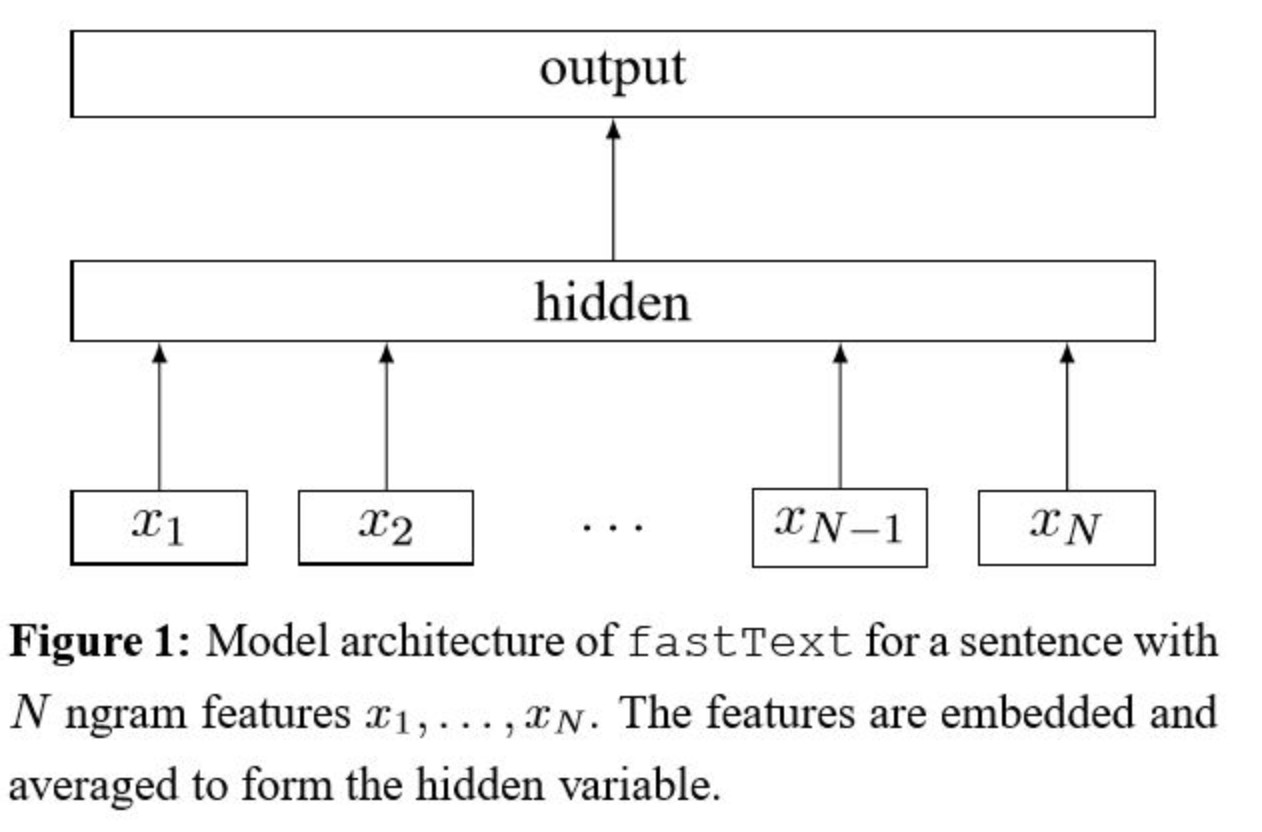

# Fasttext Model as our benchmark model

## &emsp;&emsp; The below I did experiment changing the top N prodcuts the model we cover, ranging from 10~60

# Note
### &emsp;&emsp;&emsp; 1.Make sure you installed the latest fasttext model in your host machine already before running this experiment
### &emsp;&emsp;&emsp; 2.Put the installed fasttext library (fastText-0.9.1) under the same level of directory with notebooks. Otherwise, it will raise error.
### &emsp;&emsp;&emsp; 3.Reference:https://fasttext.cc/docs/en/support.html


In [2]:
def get_data_ft(lines, out_file_path):
    """
    prepare data formate for feeding into fasttext
    """
    prefix_FastText = '__label__'
    f = open(out_file_path, "w")
    ground_truth = []
    for i in range(0, len(lines), 2):
        text = lines[i].strip()
        label = prefix_FastText + str(lines[i + 1].strip())
        ground_truth.append(int(lines[i + 1].strip()))
        output_form = label + ' ' + text
        f.write(output_form)
        f.write('\n')
    f.close()
    print ("get data for fasttext finished")
    return ground_truth
    
def load_data_ft():

    # load data
    fname = "../data/train.txt"
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    lines_train = fin.readlines()
    fin.close()

    fname = "../data/test.txt"
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    lines_test = fin.readlines()
    fin.close()
    return lines_train, lines_test

In [9]:
output_dir = "../data/"

F1_scores = []
Precisions = []
Recalls = []
Accs = []
for top_N in [10, 20, 30, 40, 50, 60]:
    print ("number of class : {}".format(top_N + 1))
    
    # get train/test split
    cmd = "python3 ../code/src/data_process.py --N {} --data_path ../data --output_path ../data".format(top_N)
    os.system(cmd)
    
    # preapre data for fasttext
    lines_train, lines_test = load_data_ft()
    print ("number of training data", len(lines_train)//2)
    print ("number of testing data", len(lines_test)//2)
    get_data_ft(lines_train, os.path.join(output_dir, "train_ft.txt"))
    y_true = get_data_ft(lines_test, os.path.join(output_dir, "test_ft.txt"))
    
    assert pd.Series([str(lines_train[i + 1].strip()) for i in range(0, len(lines_train), 2)]).nunique()==top_N+1, "sth wrong"

    # train
    epoch = 25
    n_gram = 2
    cmd = '../fastText-0.9.1/fasttext supervised -input ../data/train_ft.txt -output ../ft_model/model_tune -epoch {} -wordNgrams {}'.format(epoch, n_gram)            
    os.system(cmd)
    
    # predict on validation set
    cmd = '../fastText-0.9.1/fasttext predict ../ft_model/model_tune.bin ../data/test_ft.txt 1 > predict.txt' 
    os.system(cmd)


    f = open("predict.txt", 'r')
    y_pred = [int(i.strip().replace('\t','').replace("__label__",'')) for i in f.readlines()]
    f.close()
    f1 = f1_score(y_true, y_pred, labels=[i for i in range(top_N + 1)], average='macro')
    P = precision_score(y_true, y_pred, labels=[i for i in range(top_N + 1)], average='macro')
    R = recall_score(y_true, y_pred, labels=[i for i in range(top_N + 1)], average='macro')
    acc = accuracy_score(y_true, y_pred)
    print ("acc : {}, precision : {}, recall : {}, f1 : {}".format(acc, P, R, f1))
    F1_scores.append(f1)
    Precisions.append(P)
    Recalls.append(R)
    Accs.append(acc)
    f.close()

number of class : 11
number of training data 306452
number of testing data 76614
get data for fasttext finished
get data for fasttext finished
acc : 0.7000548202678362, precision : 0.6096573569311353, recall : 0.566097900473481, f1 : 0.5859596814305555
number of class : 21
number of training data 306452
number of testing data 76614
get data for fasttext finished
get data for fasttext finished
acc : 0.6275093324979769, precision : 0.5612810927002785, recall : 0.5286212468890347, f1 : 0.5420910427400981
number of class : 31
number of training data 306452
number of testing data 76614
get data for fasttext finished
get data for fasttext finished
acc : 0.6127339650716579, precision : 0.5040094335240932, recall : 0.4572722436771361, f1 : 0.47207895618252516
number of class : 41
number of training data 306452
number of testing data 76614
get data for fasttext finished
get data for fasttext finished
acc : 0.6037799879917508, precision : 0.4717780376939409, recall : 0.4131986675479499, f1 : 0.4

In [10]:
F1_scores

[0.5859596814305555,
 0.5420910427400981,
 0.47207895618252516,
 0.4310103409921498,
 0.3967608606560884,
 0.36406828093813254]

In [11]:
Precisions

[0.6096573569311353,
 0.5612810927002785,
 0.5040094335240932,
 0.4717780376939409,
 0.45664591452645803,
 0.43468924164894396]

In [12]:
Recalls

[0.566097900473481,
 0.5286212468890347,
 0.4572722436771361,
 0.4131986675479499,
 0.3728073213692697,
 0.3390848637661668]

# Benchmark Experiment results
## &emsp;&emsp; As the number of class fasttext model cover increseases, coverage will increase, but the performance decreases from the all evaluation metrics' perspective.

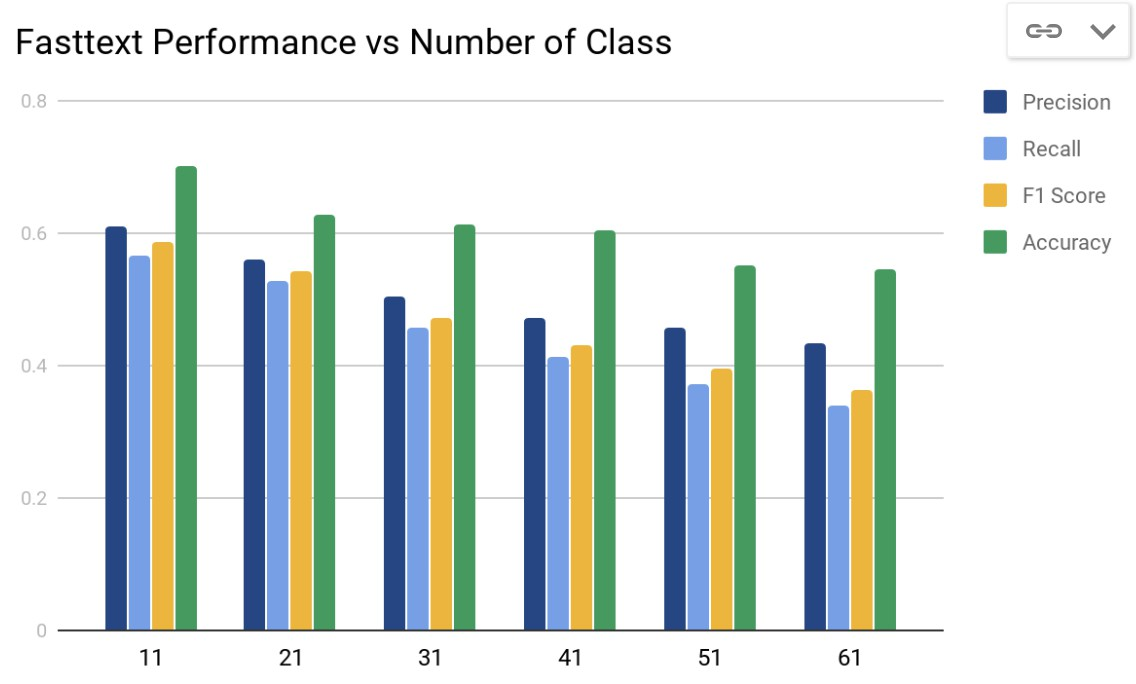